## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR= %.6f" %(lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}
    
    
    



Experiment with LR= 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.8364 - acc: 0.3408 - val_loss: 1.7142 - val_acc: 0.4002
Epoch 2/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.6046 - acc: 0.4297 - val_loss: 1.6004 - val_acc: 0.4239
Epoch 3/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.5128 - acc: 0.4663 - val_loss: 1.5051 - val_acc: 0.4639
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4533 - acc: 0.4840 - val_loss: 1.5056 - val_acc: 0.4580
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3998 - acc: 0.5017 - val_loss: 1.5447 - val_acc: 0.4489
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.3628 - acc: 0.5150 - val_loss: 1.4347 - val_acc: 0.4914
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3303 - acc: 0.5270 - val_loss: 1.4017 - val_acc

50000/50000 [==============================] - 3s 64us/step - loss: 1.8222 - acc: 0.3594 - val_loss: 1.7738 - val_acc: 0.3754
Epoch 3/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7352 - acc: 0.3921 - val_loss: 1.6987 - val_acc: 0.4085
Epoch 4/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6728 - acc: 0.4127 - val_loss: 1.6699 - val_acc: 0.4090
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6264 - acc: 0.4300 - val_loss: 1.6071 - val_acc: 0.4403
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5847 - acc: 0.4454 - val_loss: 1.5841 - val_acc: 0.4399
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5487 - acc: 0.4594 - val_loss: 1.5641 - val_acc: 0.4543
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.5183 - acc: 0.4703 - val_loss: 1.5285 - val_acc: 0.4606
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 64us/step - loss: 2.0109 - acc: 0.2996 - val_loss: 1.9815 - val_acc: 0.3075
Epoch 4/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9546 - acc: 0.3152 - val_loss: 1.9366 - val_acc: 0.3191
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.9154 - acc: 0.3300 - val_loss: 1.9015 - val_acc: 0.3350
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8858 - acc: 0.3413 - val_loss: 1.8763 - val_acc: 0.3460
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8626 - acc: 0.3495 - val_loss: 1.8549 - val_acc: 0.3530
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8420 - acc: 0.3576 - val_loss: 1.8378 - val_acc: 0.3548
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8257 - acc: 0.3621 - val_loss: 1.8218 - val_acc: 0.3645
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 65us/step - loss: 2.2357 - acc: 0.1832 - val_loss: 2.2282 - val_acc: 0.1898
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.2199 - acc: 0.2005 - val_loss: 2.2130 - val_acc: 0.2065
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 2.2052 - acc: 0.2108 - val_loss: 2.1986 - val_acc: 0.2186
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1913 - acc: 0.2189 - val_loss: 2.1849 - val_acc: 0.2277
Epoch 8/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1780 - acc: 0.2263 - val_loss: 2.1719 - val_acc: 0.2355
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1653 - acc: 0.2341 - val_loss: 2.1593 - val_acc: 0.2417
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1531 - acc: 0.2398 - val_loss: 2.1472 - val_acc: 0.2478
Epoch 11/50
50000/50000 [==========================

dict_keys(['exp-lr-0.1', 'exp-lr-0.01', 'exp-lr-0.001', 'exp-lr-0.0001', 'exp-lr-1e-05'])
i: 0
cond: exp-lr-0.1
50
range(0, 50)
dict_keys(['exp-lr-0.1', 'exp-lr-0.01', 'exp-lr-0.001', 'exp-lr-0.0001', 'exp-lr-1e-05'])
i: 1
cond: exp-lr-0.01
50
range(0, 50)
dict_keys(['exp-lr-0.1', 'exp-lr-0.01', 'exp-lr-0.001', 'exp-lr-0.0001', 'exp-lr-1e-05'])
i: 2
cond: exp-lr-0.001
50
range(0, 50)
dict_keys(['exp-lr-0.1', 'exp-lr-0.01', 'exp-lr-0.001', 'exp-lr-0.0001', 'exp-lr-1e-05'])
i: 3
cond: exp-lr-0.0001
50
range(0, 50)
dict_keys(['exp-lr-0.1', 'exp-lr-0.01', 'exp-lr-0.001', 'exp-lr-0.0001', 'exp-lr-1e-05'])
i: 4
cond: exp-lr-1e-05
50
range(0, 50)


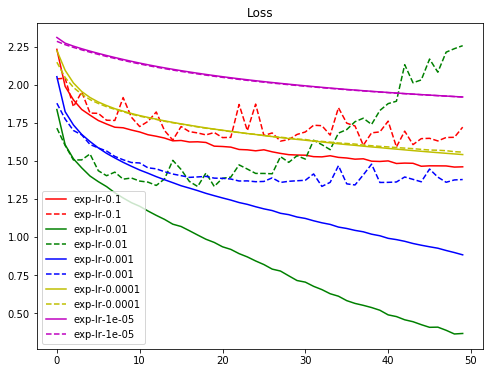

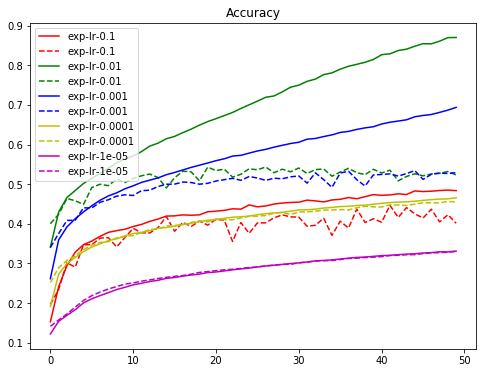

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    print(results.keys())
    print('i:', i)
    print('cond:', cond)
    print(len(results[cond]['train-loss']))
    print(range(len(results[cond]['train-loss'])))
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])

plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
